In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from nqueens import *
import matplotlib.pyplot as plt

In [2]:
# Sample sizes >= 30 are considered sufficient for the Central Limit Theorem (CLT) to hold
n_exec = 100 # Fast execution

In [3]:
# Adjusting crossover probability

generations = list()
pcs = list()
  
for pc in [0.6, 0.7, 0.8, 0.9, 1.0]:

    for i in range(n_exec):

        GA = GeneticAlgorithm(n = 8, m = 100, max_gen = 1000, mut_prob = 0.8, cross_prob = pc, k = 10)
        GA.solve()
        generations.append(GA.n_gen)
        
    pcs.append(generations.copy())        
    generations.clear()

Generations:  23%|██▎       | 227/1000 [00:00<00:00, 2141.42it/s]


Generations:  31%|███       | 310/1000 [00:00<00:00, 2178.08it/s]


Generations:   0%|          | 1/1000 [00:00<00:01, 878.20it/s]


Generations:   5%|▍         | 48/1000 [00:00<00:00, 1561.97it/s]


In [4]:
df_pcs = pd.DataFrame(data = pcs)
df_pcs = df_pcs.transpose()
df_pcs.columns = ["0.6", "0.7", "0.8", "0.9", "1.0"]
df_pcs.head()

,0.6,0.7,0.8,0.9,1.0
0,1,23,24,32,33
1,37,92,1,30,1
2,11,56,225,9,41
3,65,110,4,136,78
4,170,6,1,79,137


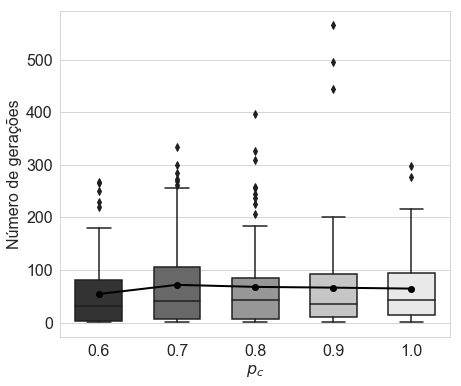

In [37]:
sns.set_style('whitegrid')
plt.figure(figsize = (7, 6))
sns.boxplot(data = df_pcs, palette = 'Greys_r', width = 0.6)
sns.lineplot(data = df_pcs.mean().values, lw = 2, color = 'black')
sns.scatterplot(data = df_pcs.mean().values, color = 'black', s = 50, linewidth = 0)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Número de gerações', fontsize = 16)
plt.xlabel('$p_c$', fontsize = 16)
plt.savefig('pc_nquees.eps', dpi = 300, bbox_inches = 'tight')
plt.show()

In [6]:
best_pc = float(df_pcs.mean().idxmin())

In [7]:
# Adjusting mutation probability

generations = list()
pms = list()
  
for pm in [0.6, 0.7, 0.8, 0.9, 1.0]:

    for i in range(n_exec):

        GA = GeneticAlgorithm(n = 8, m = 100, max_gen = 1000, mut_prob = pm, cross_prob = best_pc, k = 10)
        GA.solve()
        generations.append(GA.n_gen)
        
    pms.append(generations.copy())        
    generations.clear()

Generations:  48%|████▊     | 482/1000 [00:00<00:00, 2327.02it/s]


Generations:  10%|█         | 104/1000 [00:00<00:00, 2238.86it/s]


Generations:  14%|█▎        | 136/1000 [00:00<00:00, 2002.38it/s]


Generations:   8%|▊         | 80/1000 [00:00<00:00, 2197.18it/s]


In [8]:
df_pms = pd.DataFrame(data = pms)
df_pms = df_pms.transpose()
df_pms.columns = ["0.6", "0.7", "0.8", "0.9", "1.0"]
df_pms.head()

,0.6,0.7,0.8,0.9,1.0
0,1,19,29,44,8
1,1,64,129,1,184
2,1,461,103,22,179
3,84,48,43,1,43
4,152,271,106,131,21


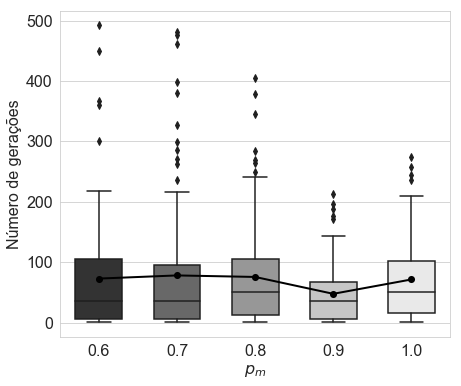

In [38]:
plt.figure(figsize = (7, 6))
sns.boxplot(data = df_pms, palette = 'Greys_r', width = 0.6)
sns.lineplot(data = df_pms.mean().values, lw = 2, color = 'black')
sns.scatterplot(data = df_pms.mean().values, color = 'black', s = 50, linewidth = 0)
plt.xticks(fontsize = 16)
plt.yticks(fontsize = 16)
plt.ylabel('Número de gerações', fontsize = 16)
plt.xlabel('$p_m$', fontsize = 16)
plt.savefig('pm_nquees.eps', dpi = 300, bbox_inches = 'tight')
plt.show()

In [10]:
best_pm = float(df_pms.mean().idxmin())

In [11]:
print('Best mutation probability:', best_pm)
print('Best crossover probability:', best_pc)

Best mutation probability: 0.9
Best crossover probability: 0.6


In [40]:
with open('nqueens.npy', 'wb') as f:
    np.save(f, pcs)
    np.save(f, pms)